<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_LSTM_RNN_on_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

**Import and scale data**

In [2]:
df=pd.read_csv('/content/Google_Stock_Price_Train.csv')
train=df[['Open']]
train.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [3]:
scaler=StandardScaler()
sc_xtrain=scaler.fit_transform(train)

In [11]:
df=pd.read_csv('/content/Google_Stock_Price_Test.csv')
xtest=df[['Open']]
xtest.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [12]:
scaler=StandardScaler()
sc_xtest=scaler.fit_transform(xtest)

**Define functions to create data for LSTM model**

In [4]:
def featureTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)):
    x.append(data[i-n_steps:i,0])
    y.append(data[i,0])
  x,y=np.array(x),np.array(y)
  return x,y

In [5]:
n_steps=12

xtrain,ytrain=featureTransform(n_steps,sc_xtrain)

xtrain.shape,ytrain.shape

((1246, 12), (1246,))

**Reshape and prepare data for LSTM model**

In [6]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

**Build and fit model**

In [7]:
from keras.layers import LSTM
from keras.layers import Dense
from keras import Sequential

In [8]:
#build model
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(xtrain,ytrain,epochs=100,batch_size=30,verbose=0)

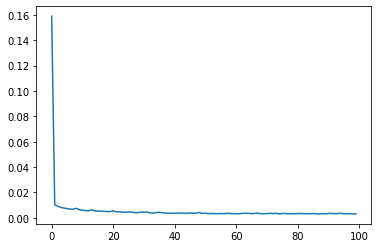

In [10]:
plt.plot(history.history['loss'])

**Prepare test data and predict**

In [13]:
xtest,ytest=featureTransform(12,sc_xtest)


In [14]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [15]:
ypred=model.predict(xtest)
predictions=scaler.inverse_transform(ypred)

In [16]:
actual=scaler.inverse_transform(ytest.reshape(-1,1))

In [17]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(actual,predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

125.44063079201709
11.200028160322503
